<a href="https://colab.research.google.com/github/Andreagazy/Machine-Learning-2024/blob/main/Pertemuan%206%20-%20Ensemble%20Learning/Tugas_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas
### Import Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree # import DT
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier # import RandomForest, AdaBoost
from sklearn.linear_model import LogisticRegression # impor Logistic Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC  # Import SVM
from sklearn.ensemble import VotingClassifier  # Import VotingClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Tugas 1
Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

### Persiapan Data

In [ ]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Cek kolom null
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Terapkan LabelEncoder ke setiap fitur kategorikal
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['class'])  # Hapus kolom target 'class'
y = df['class']  # 'e' dikonversi ke 1, 'p' ke 0

X.shape
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


### Split data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Desicion Tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Test set accuracy: 100.00%


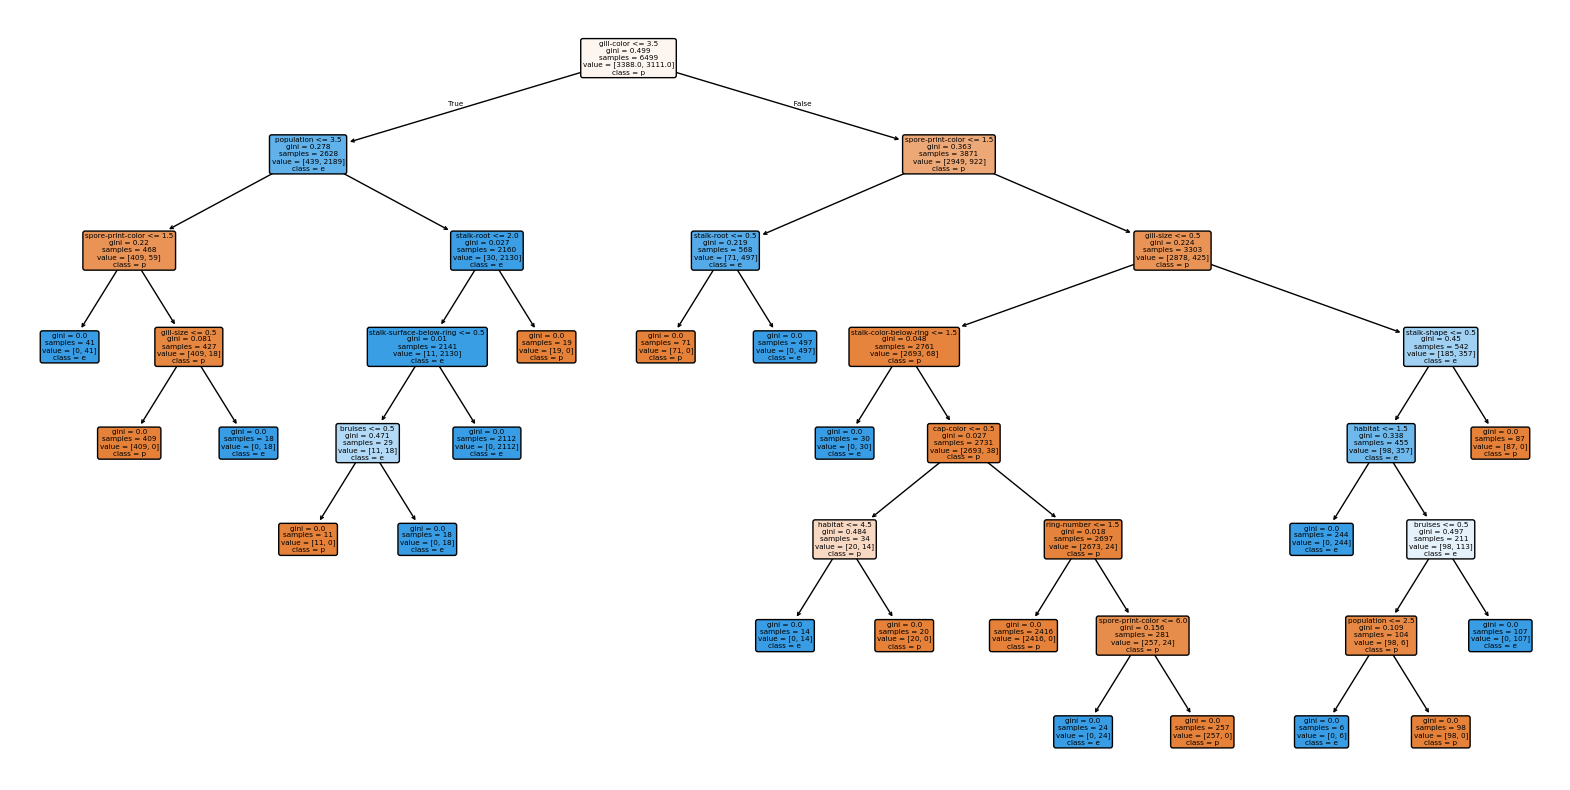

In [ ]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)


# Sesuaikan dt ke set training
grid_search_dt.fit(X_train, y_train)

y_pred_dt = grid_search_dt.predict(X_test)


# Memprediksi label set test
#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Test set accuracy: {acc_dt*100:.2f}%")



# Visualisasi menggunakan plot_tree
plt.figure(figsize=(20, 10))
plot_tree(grid_search_dt.best_estimator_,
          feature_names=X.columns,  # Feature names
          class_names=['p', 'e'],  # Class names
          filled=True,
          rounded=True)
plt.show()

### Random Forest

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Test set accuracy: 100.00%


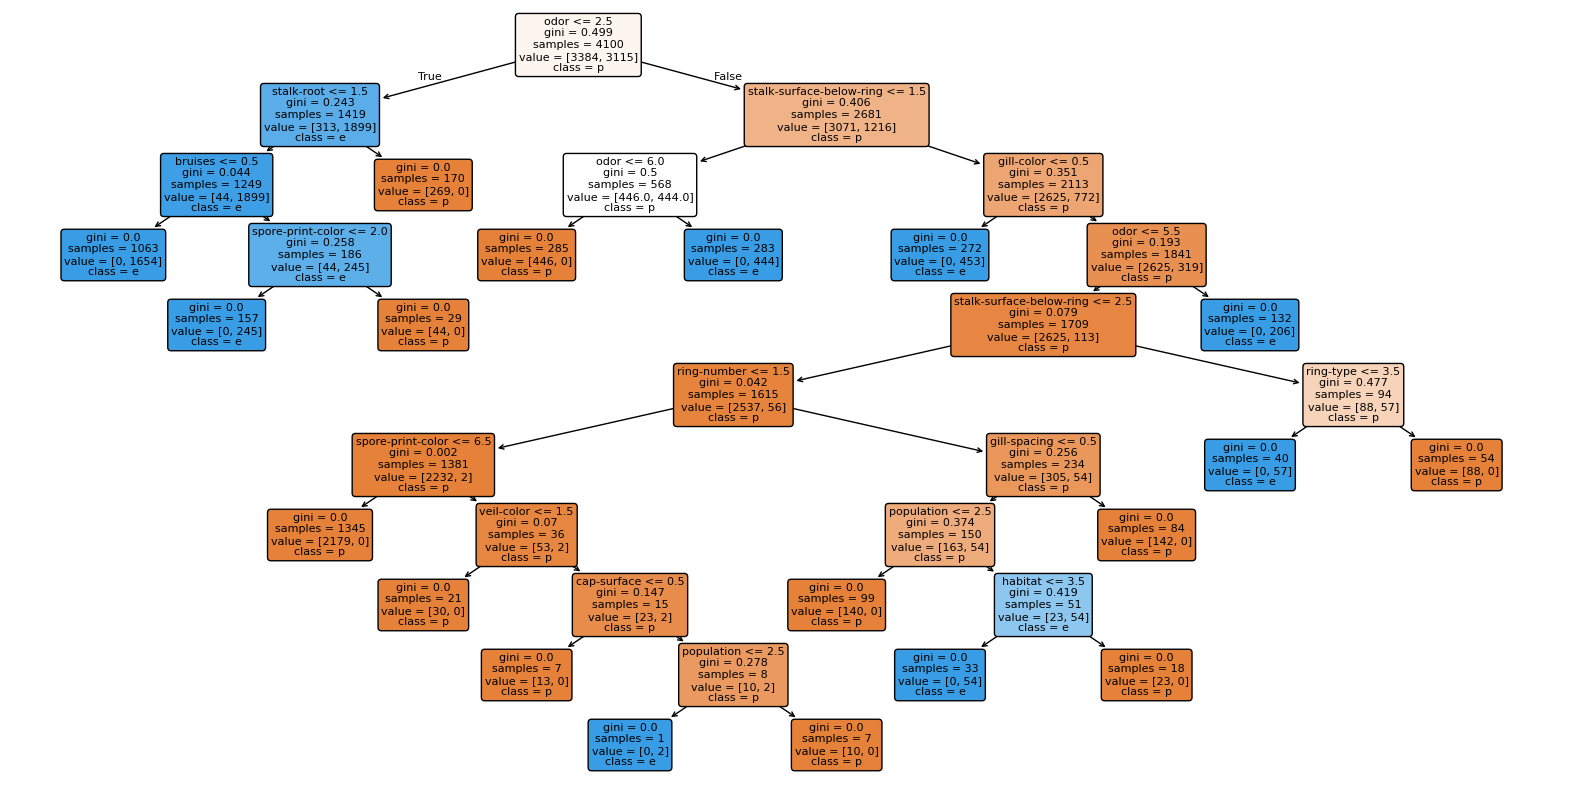

In [ ]:

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = grid_search_rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy: {acc_rf*100:.2f}%")

plt.figure(figsize=(20, 10))
plot_tree(grid_search_rf.best_estimator_.estimators_[0],  # Mengambil estimator pertama dari Random Forest
          feature_names=X.columns,
          class_names=['p', 'e'],  # Sesuaikan nama kelas
          filled=True,
          rounded=True)
plt.show()

## Tugas 2
Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

### AdaBoost

In [ ]:
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ab = AdaBoostClassifier()
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, n_jobs=-1, verbose=2)

grid_search_ab.fit(X_train, y_train)

# Memprediksi label set test
y_pred_ab = grid_search_ab.predict(X_test)

#  menghitung set accuracy
acc_ab = accuracy_score(y_test, y_pred_ab)
print(f"Test set accuracy: {acc_ab*100:.2f}%")


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test set accuracy: 100.00%


## Tugas 3

Dengan menggunakan dataset diabetes, buatlah ensemble voting dengan algoritma

1. Logistic Regression

2. SVM kernel polynomial

3. Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

### Load Data

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/diabetes.csv")

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Cek kolom null
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [10]:
# Impute nilai 0 dengan mean

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

### Split Data

In [11]:
X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standarisasi Fitur

In [12]:

sc = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Model

In [13]:
log_reg = LogisticRegression(random_state=42)
svc = SVC(kernel='poly', probability=True, random_state=42)  # SVM dengan kernel polynomial
dt = DecisionTreeClassifier(random_state=42)

### Logistic Regeression w/ Hyperparameter Tunning

In [26]:
# Definisikan hyperparameter Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver untuk optimasi
    'max_iter': [100, 200, 500]  # Jumlah iterasi maksimum
}

# GridSearchCV untuk Logistic Regression
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, cv=5, verbose=1, n_jobs=-1)

# Fit model Logistic Regression
grid_search_logreg.fit(X_train_std, y_train)

# Prediksi pada data test
y_pred_logreg = grid_search_logreg.best_estimator_.predict(X_test_std)

# Evaluasi Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy (Logistic Regression): {accuracy_logreg*100:.2f}%")
print(f"Classification Report (Logistic Regression):\n{classification_report(y_test, y_pred_logreg)}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy (Logistic Regression): 73.59%
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



### SVM polynomial w/ Hyperparemeter Tunning

In [22]:
param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularisasi
    'degree': [2, 3, 4],  # Derajat polynomial
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# GridSearchCV untuk SVM
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, verbose=1, n_jobs=-1)

# Fit model SVM
grid_search_svc.fit(X_train_std, y_train)

# Prediksi pada data test
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test_std)

# Evaluasi SVM
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy (SVM): {accuracy_svc*100:.2f}%")
print(f"Classification Report (SVM):\n{classification_report(y_test, y_pred_svc)}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy (SVM): 69.70%
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       151
           1       0.61      0.35      0.44        80

    accuracy                           0.70       231
   macro avg       0.66      0.62      0.62       231
weighted avg       0.68      0.70      0.67       231



### Desicion Tree w/ Hyperparameter Tunning

In [23]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],  # Maksimal kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum jumlah sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Minimum jumlah sampel di setiap daun
}

# GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, verbose=1, n_jobs=-1)

# Fit model Decision Tree
grid_search_dt.fit(X_train_std, y_train)

# Prediksi pada data test
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_std)

# Evaluasi Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt*100:.2f}%")
print(f"Classification Report (Decision Tree):\n{classification_report(y_test, y_pred_dt)}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Accuracy (Decision Tree): 74.46%
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



### Ensemble Voting

In [25]:
# Definisikan model dengan hyperparameter terbaik dari GridSearch
log_reg_best = grid_search_logreg.best_estimator_  # Logistic Regression terbaik
svc_best = grid_search_svc.best_estimator_         # SVM terbaik
dt_best = grid_search_dt.best_estimator_           # Decision Tree terbaik

# Ensemble Voting dengan soft voting
voting_clf = VotingClassifier(estimators=[('lr', log_reg_best), ('svc', svc_best), ('dt', dt_best)], voting='soft')

# Fit model pada data train
voting_clf.fit(X_train_std, y_train)

# Prediksi pada data test
y_pred_voting = voting_clf.predict(X_test_std)

# Evaluasi Ensemble Voting
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy (Ensemble Voting): {accuracy_voting*100:.2f}%")
print(f"Classification Report (Ensemble Voting):\n{classification_report(y_test, y_pred_voting)}")


Accuracy (Ensemble Voting): 76.19%
Classification Report (Ensemble Voting):
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       151
           1       0.69      0.57      0.63        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231

